# MAC0460/MAC5832 (2020)
## EP1 -- Perceptron: toy example

Seja um conjunto de treinamento $X = \{ (\mathbf{x}^{(1)},y^{(1)}), (\mathbf{x}^{(2)},y^{(2)}), \ldots, (\mathbf{x}^{(N)},y^{(N)})\}$, $\mathbf{x}^{(i)} \in \mathbb{R}^d$ e $y^{(i)} \in \{-1, +1\}$, $i=1,2,\ldots,N$, linearmente separáveis. Dado $\mathbf{x} = (x_1, \ldots, x_d)  \in \mathbb{R}^d$, seja $\tilde{\mathbf{x}} = (1, x_1, \ldots, x_d) \in \mathbb{R}^{1+d}$.

O perceptron determina um vetor de pesos $\mathbf{w} \in \mathbb{R}^{1+d}$ de tal forma que $\mathrm{sign}(\mathbf{w}^T \tilde{\mathbf{x}}^{(i)}) = y^{(i)}$, $\forall i$, na qual 
$$
sign(z) = \left\{\begin{array}{ll}+1, & \mbox{se $z \geq 0$,}\\ -1, & \mbox{se $z < 0$.}\\
\end{array}\right.
$$

O objetivo deste EP é implementar o algoritmo perceptron para dados em $\mathbb{R}^2$ e testá-lo em casos com poucos exemplos. 


### 1. Gerar os pontos e uma target function
- o dataset consistirá de alguns ($N$) pontos definidos a mão. Alguns desses pontos serão os vértices do quadrado $[0,1]\times[0,1]$
- definiremos uma reta $f(x_1,x_2) = w_0 + w_1\,x_1 + w_2\,x_2$ que corta o quadrado $[0,1]\times [0,1]$
- aqui vamos plotar esses pontos de tal forma que os pontos $(x_1,x_2)$ tais que $f(x_1,x_2) \geq 0$ (<font color="blue">positivo</font>) são plotados em <font color="blue">azul</font> e os pontos $(x_1,x_2)$ tais que $f(x_1,x_2) < 0$ (<font color="red">negativo</font>) são plotados em <font color="red">vermelho</font>
- a classe de cada um dos $N$ pontos será portanto dado pelo sinal de $f$ 

Shape of array X:  (5, 2)
Number of examples:  5
Shape of array Xe:  (5, 3)
Target weight array:  [ 0.5 -1.   1. ]
Shape of array y:  (5,)
['red', 'blue', 'blue', 'red', 'blue']


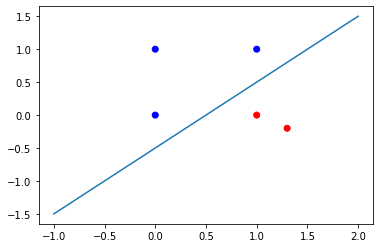

In [204]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.asarray([[1.3, -0.2],[0,0],[0,1],[1,0],[1,1]])
print("Shape of array X: ", X.shape)
N = X.shape[0]
print("Number of examples: ", N)

# add a left column with 1's into X -- X extended
Xe = np.hstack(( np.ones((X.shape[0],1)), X ) )
print("Shape of array Xe: ", Xe.shape)

# define a target weight vector
w_target = np.asarray([0.5, -1, 1])
print("Target weight array: ", w_target)

# define y (class) values, based on the line defined by the target weight vector
y = np.sign(np.dot(Xe, w_target))
print("Shape of array y: ", y.shape)

# Plotting ...

# plot the line
a = -w_target[1] / w_target[2] # slope  -- we will have trouble if w_target[2]=0 ...
b = -w_target[0] / w_target[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

# Determine the colors of each of the examples
colors = ["blue" if y[i]==1 else "red" for i in range(N)]
print(colors)

# plot the examples
plt.scatter(X[:,0],X[:,1],c=colors);



### Chutar uma hipótese inicial

Aqui iremos considerar um peso inicial para a função linear que sabidamente não é a função target e iremos plotar um gráfico dos exemplos com a seguinte convenção:

Cor indica o <i>ground-truth</i> (definido pela função target acima): <font color="blue">positivo</font> e <font color="red">negativo</font>  
Formato do marcador:
- o : classificados corretamente pela hipótese<br>
- x : classificados incorretamente pela hipótese<br>


y [-1.  1.  1. -1.  1.] yhat [ 1. -1.  1.  1.  1.] Xe [[ 1.   1.3 -0.2]
 [ 1.   0.   0. ]
 [ 1.   0.   1. ]
 [ 1.   1.   0. ]
 [ 1.   1.   1. ]]


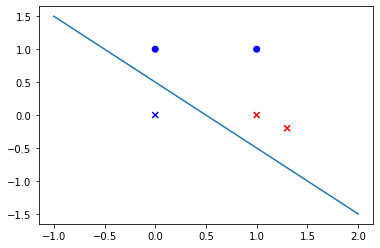

In [205]:
# Dada uma hipótese qualquer, se o sinal coincidir com o original,
# desenha-se bola, se não coincidir, desenha-se x. A cor identifica
# a classificação correta (ground-truth)

# vetor de pesos inicial
w0 = np.asarray([-0.5, 1 , 1])

# calcular yhat
yhat = np.sign(np.dot(Xe,w0))

print ('y', y, 'yhat', yhat, 'Xe', Xe)

# misclassifications
misclassified = np.where(y != yhat)[0]
correct = np.where(y == yhat)[0]

colors_o = ["blue" if y[i]==1 else "red" for i in correct]
colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]


# plotting
a = -w0[1] / w0[2] # slope
b = -w0[0] / w0[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

plt.scatter(X[correct,0],X[correct,1],c=colors_o, marker='o');
plt.scatter(X[misclassified,0],X[misclassified,1],c=colors_x, marker='x');


# O algoritmo perceptron

Escreva abaixo o seu código para o algoritmo PERCEPTRON. 

Escreva a função e em seguida teste a função com os dados X, y e w0 definidos nos blocos acima.  Faça ao menos um plot do resultado final (pontos e a reta final) seguindo as cores e marcas (x, o) de acordo com a convenção acima.

<b>Opcional</b>: faça uma animação, mostrando como a reta vai mudando ao longo das iterações.

number of iteractions: 5 final weight vector: [ 1.  -1.6  1.4]


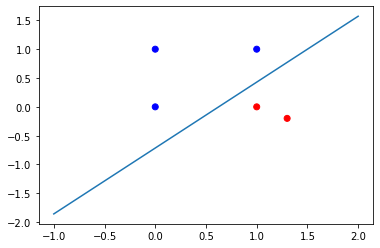

In [206]:
def perceptron(Xe,y,w0):
    k=0
    w=w0
    for j in Xe:
        if(y[k]*np.dot(Xe[k],w0)<=0): #in the first point the signs differ the weight vector is updated
            w=w0+y[k]*Xe[k]
            break
        k+=1
    return w #if all the points are correctly assigned the function returns the same weight vector as the input
        
    
    
    
# test your function for w0, X and y as defined above
wi=w0
wi=np.asarray([0, 0,  0])
M=50 #here you can change the maximum number of iteractions, it's a failsafe in case the points are not linearly separable
i=0
w=perceptron(Xe, y, wi)
while (not np.array_equal(w, wi) and i<M):
    tmp=perceptron(Xe, y, w)
    wi=w
    w=tmp
    i+=1
    
    
# Print the final weight vector and plot both the examples and
# the separating line
print('number of iteractions:', i, 'final weight vector:', w)

# plotplotplot
yhat = np.sign(np.dot(Xe,w))
misclassified = np.where(y != yhat)[0]
correct = np.where(y == yhat)[0]

colors_o = ["blue" if y[i]==1 else "red" for i in correct]
colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]
a = -w[1] / w[2] # slope
b = -w[0] / w[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

plt.scatter(X[correct,0],X[correct,1],c=colors_o, marker='o');
plt.scatter(X[misclassified,0],X[misclassified,1],c=colors_x, marker='x');

# O que mais poderia ser feito ?

0. Alterar o número de pontos e/ou vetor de pesos inicial no exemplo acima e testar o código.
1. Alterar o código para funcionar para dados de dimensão $d$ arbitrária
2. Alterar o código para que o vetor de pesos inicial seja definida aleatoriamente
3. Geral os exemplos $\mathbf{x}$ de forma aleatória (talvez 2 blobs de pontos?)
4. Alterar o código para implementar a versão POCKET, para dar conta dos casos não linearmente separáveis

# Versão Pocket


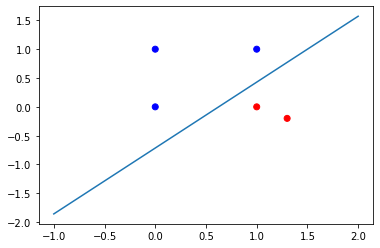

In [207]:
wi=np.asarray([0, 0,  0]) #initiate the weight vector to whatever your heart desires
pkt=wi #pocket vector receives the initial weight vector
M=10 #here you can change the maximum number of iteractions, and we're assuming the points are not linearly separable
i=0
max=0
w=perceptron(Xe, y, wi)
while (not np.array_equal(w, wi) and i<M):
    tmp=perceptron(Xe, y, w)
    wi=w
    w=tmp
    p=np.sum(y==np.sign(np.dot(Xe,w)))
    if(p>max): #if the current weight vector is correct for more points than any previous one it's stored in the pocket
        max=p
        pkt=w
    i+=1

    
# plotplotplot
yhat = np.sign(np.dot(Xe,pkt))
misclassified = np.where(y != yhat)[0]
correct = np.where(y == yhat)[0]

colors_o = ["blue" if y[i]==1 else "red" for i in correct]
colors_x = ["blue" if y[i]==1 else "red" for i in misclassified]
a = -pkt[1] / pkt[2] # slope
b = -pkt[0] / pkt[2] # intercept
x_l = np.linspace(-1, 2, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

plt.scatter(X[correct,0],X[correct,1],c=colors_o, marker='o');
plt.scatter(X[misclassified,0],X[misclassified,1],c=colors_x, marker='x');

# Vetor peso e pontos aleatórios
Aqui serão gerados números para os valores do vetor peso inicial e dos pontos.
Como a versão pocket foi implementada, não vou me preocupar em tornar os pontos nescessariamente linearmente separáveis, mas foram usadas distribuições de probabilidade de modo a clusterizá-los

In [208]:
wrand = np.random.uniform (-1, 1, 3) #the random weight vector is generated
print (wrand)

[ 0.29202291 -0.29654691 -0.89205855]


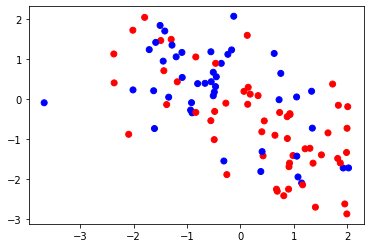

In [209]:
n=100
x11=np.random.normal(-1, 0.8, (int(n/2)))
x12=np.random.normal(1, 0.8, (int(n/2)))
x21=np.random.normal(1, 0.8, (int(n/2)))
x22=np.random.normal(-1, 0.8, (int(n/2)))

X1=np.column_stack((x11, x12))
X2=np.column_stack((x21, x22))

Xrand = np.concatenate((X1, X2))
Xrand = np.hstack(( np.ones((Xrand.shape[0],1)), Xrand ) ) # Adds a column of 1s
#yrand = np.sign(np.random.uniform(-1,1,n)) #generates a random y vector
yrand = np.sign( np.concatenate((1-np.random.pareto(2,int(n/2)), 1-np.random.pareto(0.5,int(n/2)))) )
#print (yrand)


colors = ["blue" if yrand[i]==1 else "red" for i in range(n)]

# plot the examples
plt.scatter(Xrand[:,1],Xrand[:,2],c=colors);

E aqui rodamos o perceptron

num of iteractions 50 pkt iteraction 10


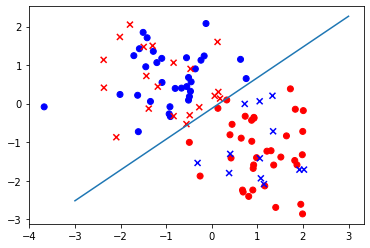

In [210]:
wi=wrand
pkt=wi #pocket vector receives the random initial weight vector
M=50 #here you can change the maximum number of iteractions, and we're assuming the points are not linearly separable
i=0
max=0
w=perceptron(Xrand, yrand, wrand)
while (i<M):
    tmp=perceptron(Xe, y, w)
    wi=w
    w=tmp
    p=np.sum(y==np.sign(np.dot(Xe,w)))
    if(p>max): #if the current weight vector is correct for more points than any previous one it's stored in the pocket
        max=p
        pkt=w
        it=i
    i+=1

print('num of iteractions', i, 'pkt iteraction', it)
# plotplotplot
yhat = np.sign(np.dot(Xrand,pkt))
misclassified = np.where(yrand != yhat)[0]
correct = np.where(yrand == yhat)[0]

colors_o = ["blue" if yrand[i]==1 else "red" for i in correct]
colors_x = ["blue" if yrand[i]==1 else "red" for i in misclassified]
a = -pkt[1] / pkt[2] # slope
b = -pkt[0] / pkt[2] # intercept
x_l = np.linspace(-3, 3, 50)
y_l = a*x_l + b
plt.plot(x_l, y_l);

plt.scatter(Xrand[correct,1],Xrand[correct,2],c=colors_o, marker='o');
plt.scatter(Xrand[misclassified,1],Xrand[misclassified,2],c=colors_x, marker='x');

# Caso multidimensional:
O algorítmo pode ser usado para um número arbitrário de dimensões sem alterações no seu código. Basta gerar os pontos no hiperplano desejado

In [211]:
d=5 #number of dimensions
n=10 #number of points
Xd=np.random.uniform(-1, 1, (n,d))
wt=np.random.uniform(-1, 1, d) #generates a random target vector
print ('original weight vector:', wt)
y=np.sign(np.dot(Xd, wt))

wi=np.random.uniform(-1, 1, d) #initiate the weight vector with random values

M=50 #here you can change the maximum number of iteractions, it's a failsafe in case the points are not linearly separable
i=0
w=perceptron(Xd, y, wi)
while (not np.array_equal(w, wi) and i<M):
    tmp=perceptron(Xd, y, w)
    wi=w
    w=tmp
    i+=1

print ('final weight vector:', w)
yhat=np.sign(np.dot(Xd,w))
print(np.array_equal(y, yhat)) #checks if the algorithm succeded

original weight vector: [ 0.7958193  -0.12235453  0.29465119  0.10677876  0.17127865]
final weight vector: [ 1.01699957 -0.92452677  0.54301172 -0.08595275  0.31089876]
True
